<a href="https://colab.research.google.com/github/luabras/fashion-mnist-model/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A simple model for classifying clothes using the Fashion-MNIST dataset.

Used libraries:

* Tensorflow
* Keras
* NumPy
* MatpLotlib

Imports

In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Loading dataset

In [2]:
# Loading dataset and saving in a variable
dataset = keras.datasets.fashion_mnist
((imagensTreino, identificacoesTreino), (imagensTeste, identificacoesTeste)) = dataset.load_data() # Returns two tuples (training and test data)

imagensTreino

4423680/4422102 [==============================] - 0s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

Getting dataset size and image specifications

In [3]:
len(imagensTreino)
imagensTreino.shape # an array of 28 rows and 28 columns

(60000, 28, 28)

In [4]:
len(imagensTeste)
imagensTeste.shape

(10000, 28, 28)

In [ ]:
len(identificacoesTreino)

60000

Showing image using matplotlib function

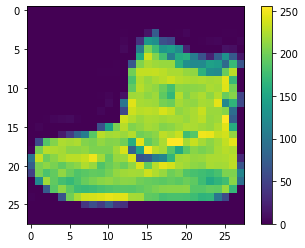

In [ ]:
totalClassificacoes = 10

nomesClassificacoes = ['Camiseta', 'Calca', 'Pullover', 'Vestido', 'Casaco', 'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Bota']

# Seeing that we have from 0 to 255 color values
plt.imshow(imagensTreino[0])
plt.colorbar()

**Model**

* Keras sequential model: inputs, processing and outputs.
* The images are formed by 28 lines and 28 columns, each cell is a pixel
* We want to transform 28x28 matrix in a vector, then it is used the Flatten function
* Processing using the tensorflow relu neural network
* Output layer has density 10, as it is the number of different classifications
* Output algorithm (softmax) will compare images with categories and give a percentage of accuracy

In [ ]:
# Dividing by the number of colors to reduce losses (normalization)
imagensTreino = imagensTreino/float(255)

modelo = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           # Leaving 20% dormant
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(10, activation=tensorflow.nn.softmax)
                           ])

# Compiling model (optimizer, loss)
# Adam indicated because the dataset has more than 2 categories

modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
modelo.fit(imagensTreino, identificacoesTreino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5262 - accuracy: 0.8139 - val_loss: 0.4025 - val_accuracy: 0.8557
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4009 - accuracy: 0.8538 - val_loss: 0.3753 - val_accuracy: 0.8622
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3658 - accuracy: 0.8675 - val_loss: 0.3599 - val_accuracy: 0.8693
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3408 - accuracy: 0.8728 - val_loss: 0.3497 - val_accuracy: 0.8722
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3227 - accuracy: 0.8813 - val_loss: 0.3325 - val_accuracy: 0.8800


Testing model

In [ ]:
testes = modelo.predict(imagensTeste)

# Getting the largest number to identify the label
print(np.argmax(testes[0]))
print(identificacoesTeste[0])

9
9


Evaluating model (loss, accuracy)

In [ ]:
modelo.evaluate(imagensTeste, identificacoesTeste)

313/313 [==============================] - 0s 2ms/step - loss: 145044.1094 - accuracy: 0.1353


[145044.109375, 0.13529999554157257]

Saving model

In [ ]:
modelo.save('modelo.h5')

In [ ]:
modeloSalvo = load_model('modelo.h5')

testeModeloSalvo = modeloSalvo.predict(imagensTeste)
np.argmax(testeModeloSalvo[1])
identificacoesTeste[1]

2